In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


In [58]:
np.random.seed(23)
def data_gen(n_samples):
    x=np.sort(np.random.uniform(0,1,n_samples))
    N=np.random.normal(0,1,n_samples)
    y=np.sin(2*np.pi*x)+0.1*N
    data=pd.DataFrame()#DataFrame is a structure 
    #that contains two-dimensional data and its corresponding labels.
    data['X']=x
    data['Y']=y
    return data


In [59]:
data= data_gen(n_samples=20)
print(data)

           X         Y
0   0.002465  0.059660
1   0.065075  0.510471
2   0.167139  0.683699
3   0.221045  0.889620
4   0.282396  0.959171
5   0.287934  1.076266
6   0.294744  1.014557
7   0.300410  1.031470
8   0.392442  0.649635
9   0.411930  0.430297
10  0.517298 -0.122099
11  0.589582 -0.406882
12  0.618052 -0.658212
13  0.686222 -1.043103
14  0.765460 -0.853754
15  0.845094 -0.780978
16  0.884032 -0.592973
17  0.884948 -0.464716
18  0.946963 -0.381889
19  0.978427 -0.203075


In [60]:
def train_test_split(data):
    train_data=data.sample(frac=0.5,random_state=23)
    # Return a random sample of items from an axis of object
    test_data=data.drop(train_data.index).sample(frac=1.0)
    # Drop specified labels from rows or columns.
    x_train=np.array(train_data['X']).reshape(-1,1)
    y_train=np.array(train_data['Y']).reshape(-1,1)
    x_test=np.array(test_data['X']).reshape(-1,1)
    y_test=np.array(test_data['Y']).reshape(-1,1)
    return x_train,y_train,x_test,y_test

In [61]:
x_train,y_train,x_test,y_test=train_test_split(data)
#print(x_train)

In [62]:
# Degree 0 means y=b i.e there is only bias 
w=1

#-------------------
def forward_0(x):
    return w

#-----------------------------------------
def loss(y,y_pred):
    loss=np.sqrt(np.mean((y_pred-y)**2))
    return loss

#------------------------------------------                 
def gradient_0(x, y, y_pred):  
    m = x.shape[0]
    return (2/m)*np.sum((y_pred - y)) # gradient of loss w.r.t  bias
#-------------------------------------------------------------------


In [63]:
# Training loop
losses0=[]
for epoch in range(100):
    losses=[]
    #-------------------------
    y_pred=forward_0(x_train)
    #-----------------------------------------
    grad = gradient_0(x_train, y_train, y_pred)
    #----------------------
    w= w -0.01 * grad
    #----------------------
    y_pred=forward_0(x_train)
    
    l = loss(y_train,y_pred)
    losses.append(l)
    losses0.append(l)
    if(epoch%10==0 or epoch==99):
        print("progress:", epoch, "w=", w, "loss=", np.mean(losses))


progress: 0 w= 0.9836581671791432 loss= 1.066965897343055
progress: 10 w= 0.8371792523757607 loss= 0.961918069640186
progress: 20 w= 0.7174953143075191 loss= 0.8848724108911378
progress: 30 w= 0.6197048230907456 loss= 0.8294619471712555
progress: 40 w= 0.5398028719453445 loss= 0.7903098532389694
progress: 50 w= 0.47451716044718006 loss= 0.7630541683471587
progress: 60 w= 0.4211739809037243 loss= 0.7443026785704263
progress: 70 w= 0.37758871946584655 loss= 0.7315165162136261
progress: 80 w= 0.3419763875638721 loss= 0.7228544863597057
progress: 90 w= 0.312878519576915 loss= 0.7170133983246431
progress: 99 w= 0.29127068951757695 loss= 0.7134131800086212


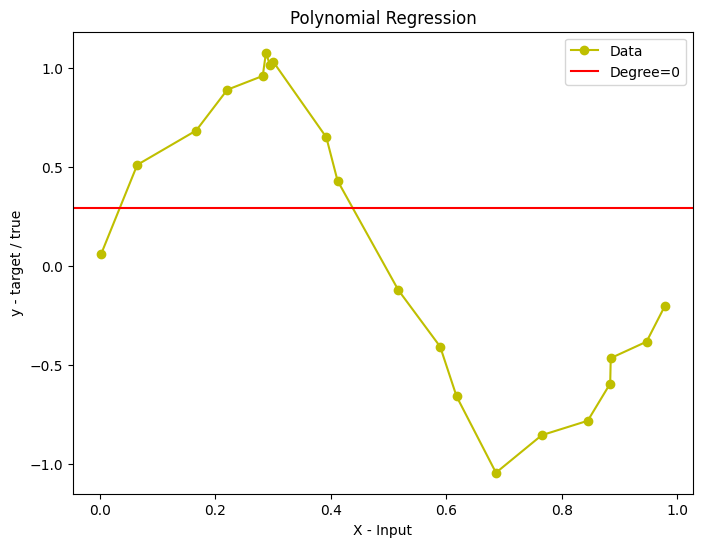

In [64]:
y_pred=forward_0(data['X'].array.reshape(-1,1))
fig = plt.figure(figsize=(8,6))
plt.plot(data['X'], data['Y'], 'yo-')
plt.axhline(y_pred, color='r')
plt.legend(["Data", "Degree=0"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()

